<a href="https://colab.research.google.com/github/dinesh19aug/fastai-course/blob/master/lesson1_man_woman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 1: Practice dataset 3:
## Summary
In this notebook, we wil be looking a imgage datset for identifying men and women. The model will load a images of men and women faces and will create a model to identify whether a given image is of a man or woman.

## DataSource: 
The dataset used is taken from kaggle datasets.
https://www.kaggle.com/gmlmrinalini/manwomandetection

Let's prep the notebook to use __fastai__ libs. 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller batch size (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64

## Loading the data
Let's take a look at the data. The zip file contains   
```
-train  
  -- man  
  -- woman
-test
  -- man
  --woman
-result
  --man
  --woman
```
We dont need the result folder, so I created a subset and removed result folder. We will only keep train and test folder.



In [3]:
%mv /dataset.zip /root/

%pwd

'/content'

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
!unzip '/root/dataset.zip'

In [6]:
path_train = pathlib.PosixPath('/content/dataset/train')
path_test = pathlib.PosixPath('/content/dataset/test')
path_train.ls()


[PosixPath('/content/dataset/train/man'),
 PosixPath('/content/dataset/train/woman')]

In [0]:
fnames=[]
gender=['man', 'woman']
for x in gender:
  files = get_image_files(path_train/x)
  for y in (files):
    fnames.append(y)

In [8]:
print(len(fnames))
fnames[:5]

1615


[PosixPath('/content/dataset/train/man/face_923.jpg'),
 PosixPath('/content/dataset/train/man/face_924.jpg'),
 PosixPath('/content/dataset/train/man/face_607.jpg'),
 PosixPath('/content/dataset/train/man/face_1300.jpg'),
 PosixPath('/content/dataset/train/man/face_1294.jpg')]

In [9]:
np.random.seed(2)
#pat = r'/([^/]+)_\d+.jpg$'
pat = r'(?<=train\/)\w+'
path_train.ls()

[PosixPath('/content/dataset/train/man'),
 PosixPath('/content/dataset/train/woman')]

In [10]:
import re
# not using 
def get_labels(file_path):
  pattern=re.compile(pat) 
  res=pattern.search(str(file_path))
  return res.group(0)
data = ImageDataBunch.from_name_func(path_train, fnames, label_func=get_labels,ds_tfms=get_transforms(do_flip=False),  size=224).normalize(imagenet_stats)
data.classes

['man', 'woman']

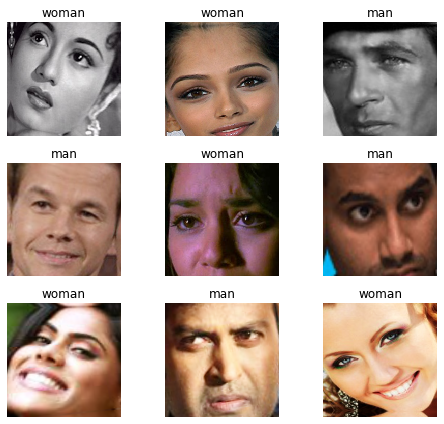

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['man', 'woman']


(2, 2)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 212MB/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.845054,0.260517,0.092879,00:13
1,0.623421,0.132066,0.055728,00:13
2,0.516939,0.177960,0.077399,00:13
3,0.430434,0.144110,0.061920,00:13
4,0.356885,0.145205,0.055728,00:13


In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

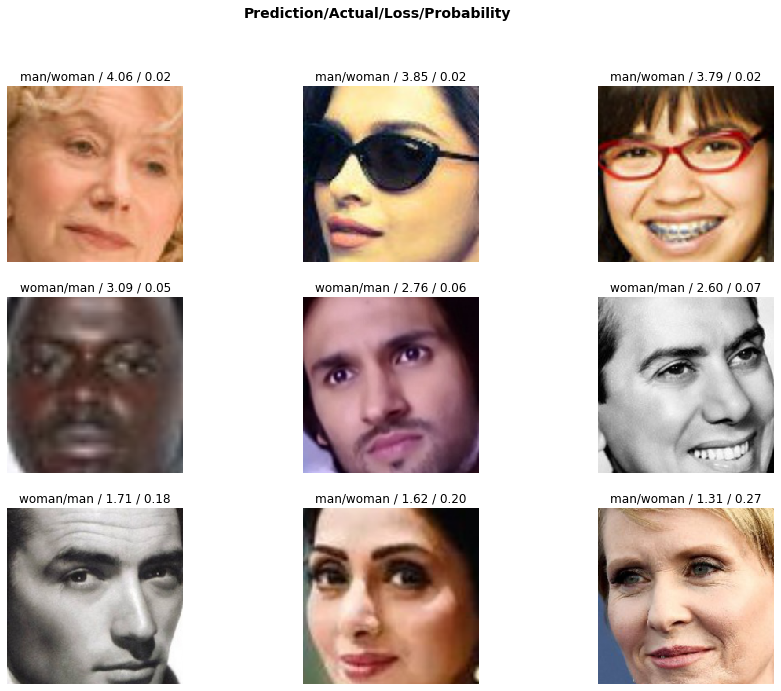

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

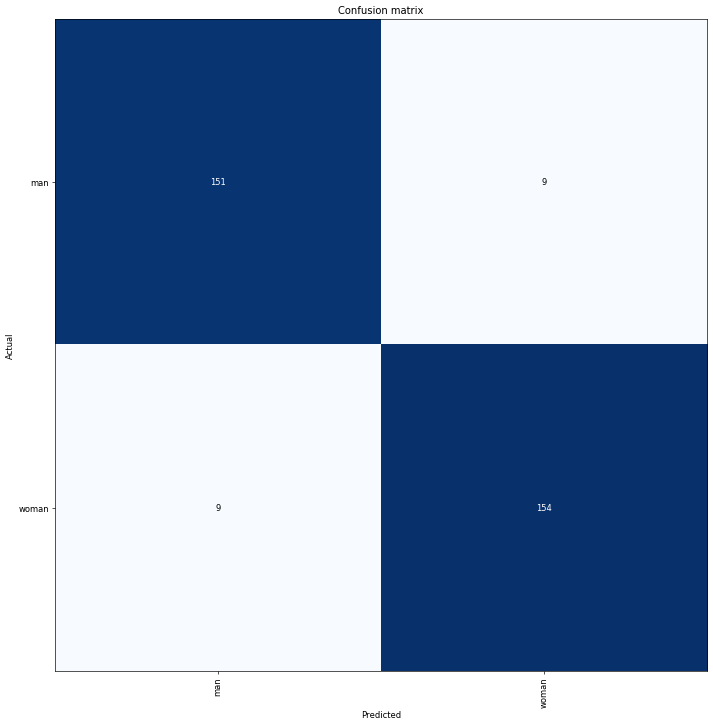

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=2)

[('man', 'woman', 9), ('woman', 'man', 9)]

In [0]:
learn.save('stage-1')

In [22]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.292993,0.195113,0.061920,00:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


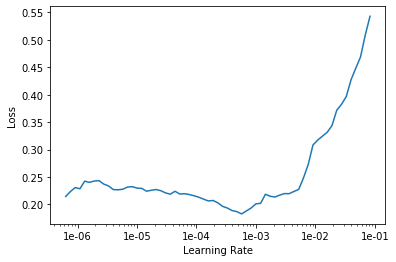

In [23]:
learn.load('stage-1');
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,(1e-3)))

epoch,train_loss,valid_loss,error_rate,time
0,0.016897,0.100817,0.034056,00:13
1,0.022883,0.092341,0.027864,00:12
2,0.021498,0.090491,0.034056,00:12
3,0.017338,0.086449,0.034056,00:12


In [0]:
learn.save('stage-2')

In [31]:
data_resnet = ImageDataBunch.from_name_func(path_train, fnames, label_func=get_labels,ds_tfms=get_transforms(do_flip=False),  size=224).normalize(imagenet_stats)
data_resnet.classes

['man', 'woman']

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 217MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


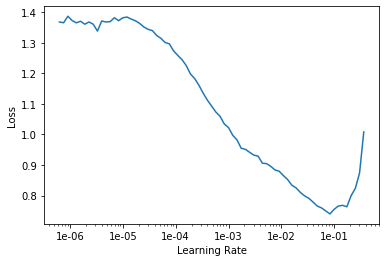

In [33]:
learn_resnet = cnn_learner(data_resnet, models.resnet50, metrics=error_rate)
learn_resnet.lr_find()
learn_resnet.recorder.plot()

In [36]:
learn_resnet.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.130329,0.219011,0.080495,00:13
1,0.139353,0.204603,0.065015,00:13
2,0.159339,0.279111,0.086687,00:13
3,0.174127,0.191676,0.071207,00:13
4,0.159040,0.177907,0.065015,00:13
5,0.148464,0.192590,0.061920,00:13
6,0.126292,0.152017,0.065015,00:13
7,0.107770,0.153250,0.052632,00:13
8,0.094462,0.161792,0.055728,00:13
9,0.090180,0.154501,0.052632,00:13


In [38]:
learn_resnet.unfreeze()
learn_resnet.fit_one_cycle(5, max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.366102,0.570775,0.052632,00:14
1,0.403373,0.724699,0.034056,00:14
2,0.573526,0.794886,0.034056,00:14
3,0.477155,0.094972,0.015480,00:14
4,0.341063,0.165180,0.021672,00:14


In [0]:
learn_resnet.save("stage-1")

In [40]:
interp = ClassificationInterpretation.from_learner(learn_resnet)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

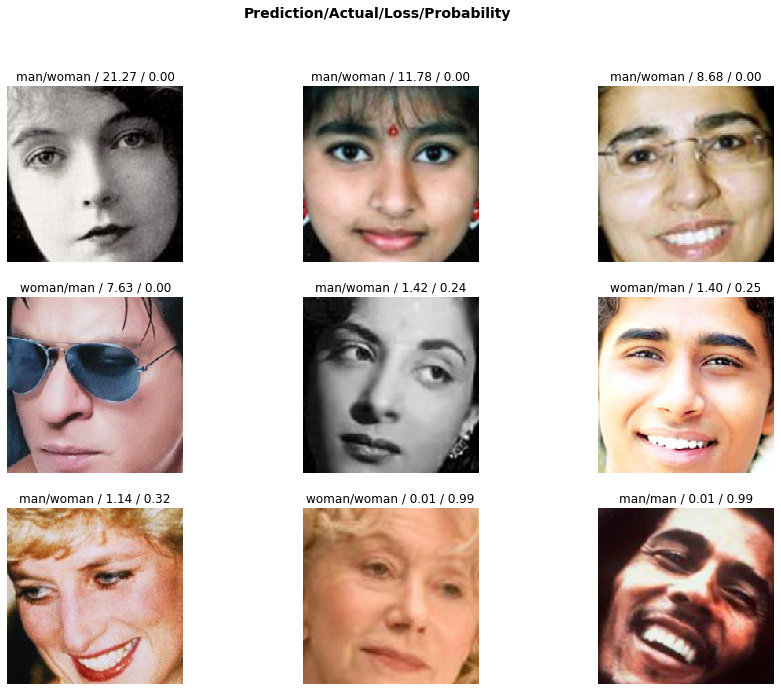

In [41]:
interp.plot_top_losses(9, figsize=(15,11))

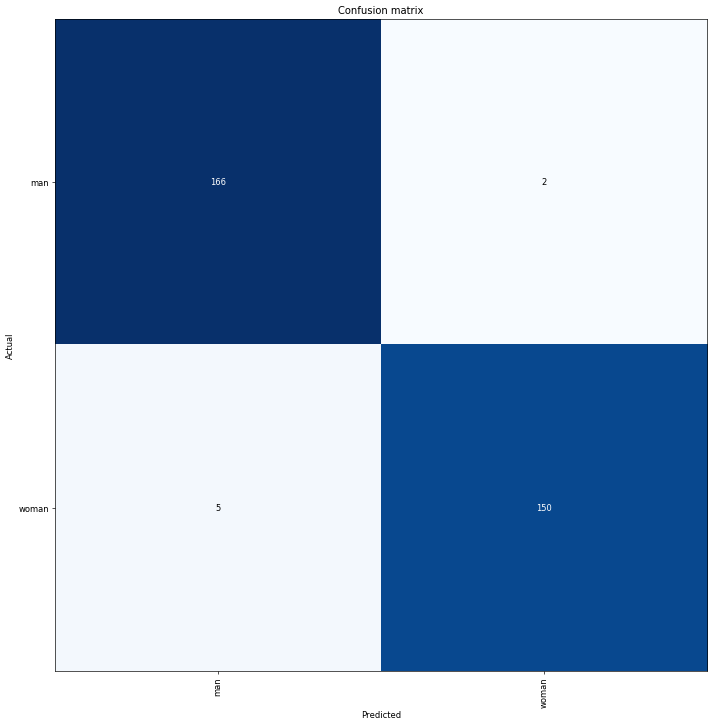

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)